# House Prices - Advanced Regression Techniques
Henrik Melin 
202e.

The next step is to either remove or replace epcles 

**Classification with Tiers:**

- Histogram

**Feature Selection and Hands-on Creative Experimentation with Suppression:**

The idea was to use the 'suppress' parameter that caused the largest error. I utilized a histogram to compare the differences between the observation lines that caused errors and the lines that worked correctly. This allowed me to visually identify which parameter incorrectly impacted the result.

I suppressed those with a 10% value.

The next step is to either remove or replace them.


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from IPython.display import display
from seaborn import swarmplot
import seaborn as sns
import warnings

#C:\Users\46763\Desktop\Project\KaggleRealEst\data
file_path = 'C:/Users/46763/Desktop/Project/KaggleRealEst/house-prices'
plt.rcParams["figure.figsize"] = (12,9)
os.chdir(file_path)


## SalePrice
### Load 

In [8]:
train_df = pd.read_csv('train.csv',low_memory=False)
#columnslist = train_df.head (7)
#columnslist.to_excel("columnslist_properties4.xlsx", index=False, sheet_name="columnslist")

In [9]:
train_df['SalePrice_SqFeet'] = round ((train_df['SalePrice']/train_df['LotArea']),0)
train_df['DecadeBuilt'] =  abs ((train_df['YearBuilt'] // 10) * 10)
train_df['DecadeRemodAdd'] = abs( ((2022 - train_df.YearRemodAdd) // 10) * 10)

numtrain_df = train_df.select_dtypes(include = ['float64', 'int64'])
classtrain_df = train_df.select_dtypes(exclude =  ['float64', 'int64'])

classtrain_df['Id'] = train_df['Id']
classtrain_df['SalePrice_SqFeet'] = train_df['SalePrice_SqFeet']

# Insert the column at the desired position (e.g., at the beginning)
column_to_move = 'Id'
id_column = classtrain_df.pop(column_to_move)
classtrain_df.insert(0, column_to_move, id_column)

In [10]:

def plot_boxplot(dataframe, x_column, y_column, title,hue_column=None):
    """
    Generate a box plot with additional information.
    Parameters:
    - dataframe: Pandas DataFrame
    - x_column: Name of the column for x-axis
    - y_column: Name of the column for y-axis
    - title: Title of the plot
    """
    plt.figure(figsize=(10, 6))
    ax = sns.boxplot(x=x_column, y=y_column, data=dataframe)


     # Add individual observations with a stripplot
    sns.stripplot(x=x_column, y=y_column, hue=hue_column, data=dataframe, color='black', jitter=True, alpha=0.5)

    # Add labels and title
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(title)


    # Show the plot
    plt.show()

In [11]:

def set_tier(dataframe, group_column, value_column, thresholds):
    """
    Parameters:
    - dataframe: Pandas DataFrame
    - group_column: Name of the column to group by
    - value_column: Name of the column to calculate mean values
    - thresholds: List of threshold values for defining tiers
    """
    # Calculate variance, mean, and count
    summary_by_class = dataframe.groupby(group_column)[value_column].agg(['var', 'mean', 'count']).reset_index()

    # Create conditions for tier assignment
    conditions = [
        (summary_by_class['mean'] <= thresholds[0]),
        (summary_by_class['mean'] > thresholds[0]) & (summary_by_class['mean'] <= thresholds[1]),
        (summary_by_class['mean'] > thresholds[1])
    ]

    # Create a list of values to assign for each condition
    values = [1, 2, 3]

    # Create a new column 'Neighborhood_tier' and use np.select to assign values
    teir_name = group_column +'_tier'
    summary_by_class[teir_name] = np.select(conditions, values)

    return summary_by_class[[group_column,teir_name]]

## Tier in classicatin text based on boxplot

### Neighborhood

In [69]:
# Ignore UserWarnings
warnings.filterwarnings("ignore", category=UserWarning)


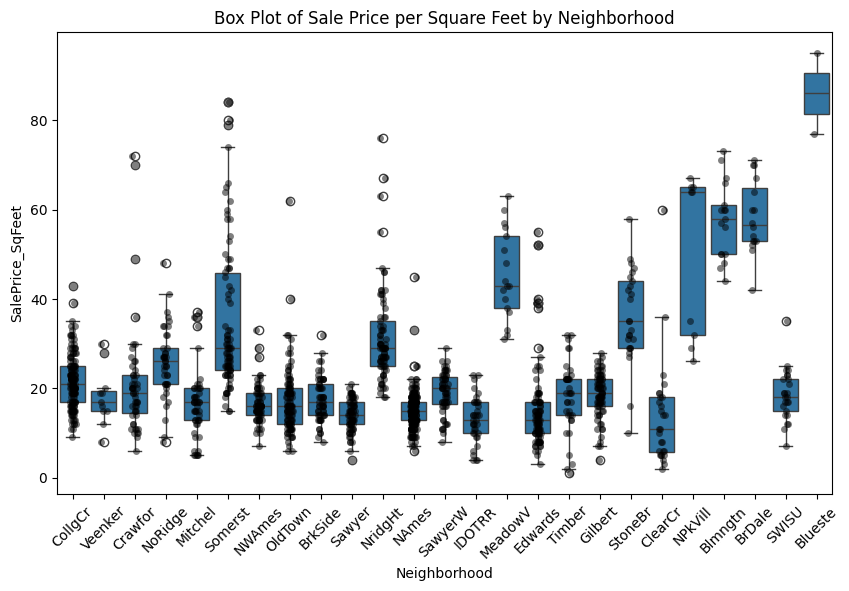

In [70]:
plot_boxplot(classtrain_df, 'Neighborhood', 'SalePrice_SqFeet', 'Box Plot of Sale Price per Square Feet by Neighborhood')

In [71]:
thresholds = [20, 32]
neighborhood_tier = set_tier(classtrain_df, 'Neighborhood', 'SalePrice_SqFeet', thresholds)


### MSZoning

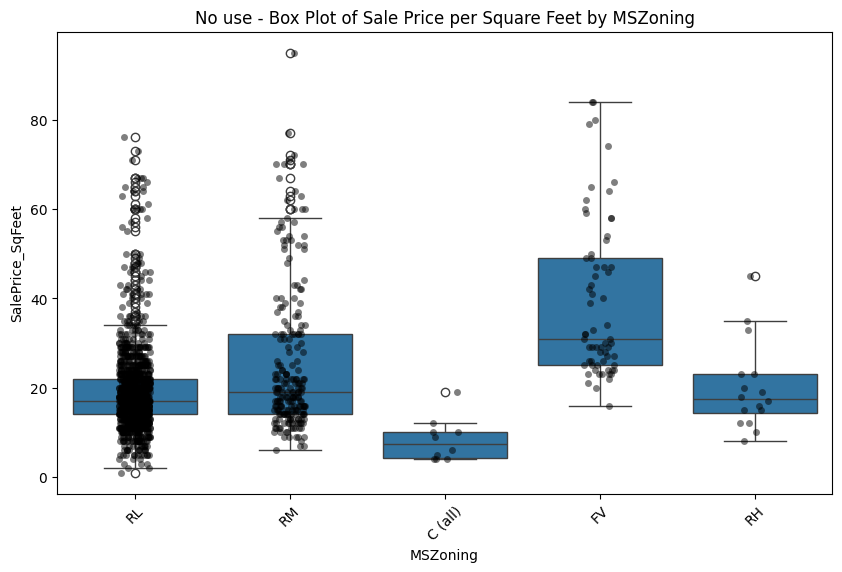

In [72]:
# calulate varance on each clas/group take the once that are have biggest spann an the check how look in boxplot 
plot_boxplot(classtrain_df, 'MSZoning', 'SalePrice_SqFeet', 'No use - Box Plot of Sale Price per Square Feet by MSZoning')

In [73]:
thresholds = [20, 32]
mszoning_tier = set_tier(classtrain_df, 'MSZoning', 'SalePrice_SqFeet', thresholds)

### SaleType

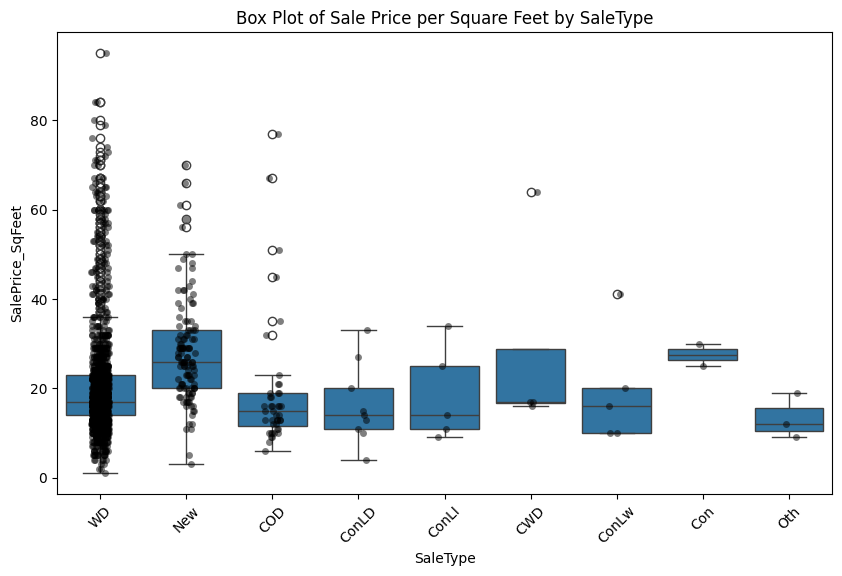

In [74]:
# calulate varance on each clas/group take the once that are have biggest spann an the check how look in boxplot 
plot_boxplot(classtrain_df,'SaleType', 'SalePrice_SqFeet', 'Box Plot of Sale Price per Square Feet by SaleType')
#classtrain_df.columns.tolist()

In [75]:
thresholds = [20, 23]
saletype_tier = set_tier(classtrain_df, 'SaleType', 'SalePrice_SqFeet', thresholds)


### HeatingQC

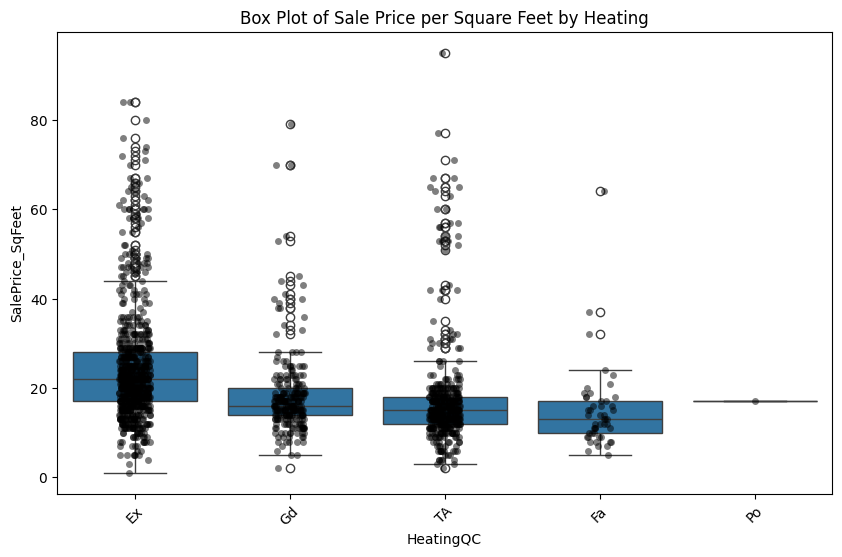

In [76]:
# calulate varance on each clas/group take the once that are have biggest spann an the check how look in boxplot 
plot_boxplot(classtrain_df,'HeatingQC', 'SalePrice_SqFeet', 'Box Plot of Sale Price per Square Feet by Heating')


In [77]:
thresholds = [18, 19]
heatingQC_tier = set_tier(classtrain_df, 'HeatingQC', 'SalePrice_SqFeet', thresholds)
heatingQC_tier = heatingQC_tier[['HeatingQC','HeatingQC_tier']]

### Exterior1st

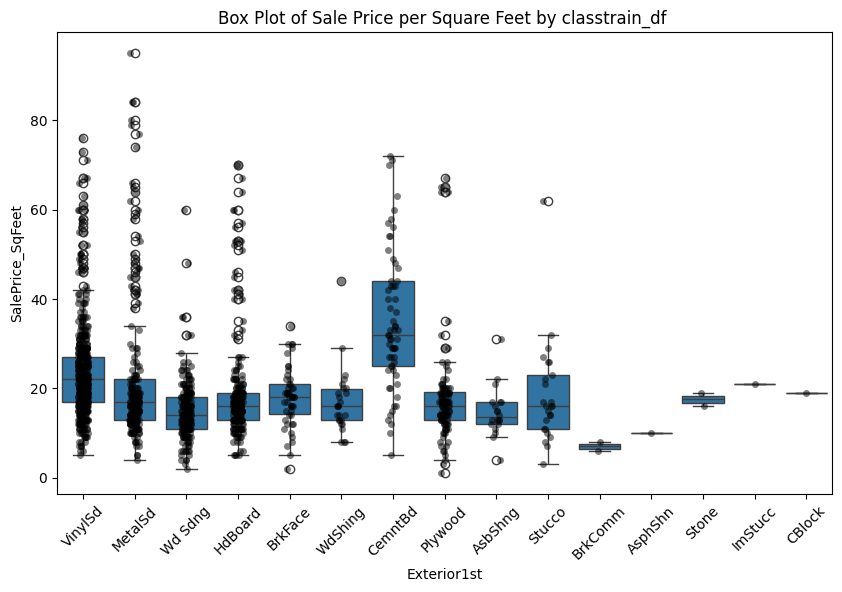

In [78]:
plot_boxplot(classtrain_df,'Exterior1st', 'SalePrice_SqFeet', 'Box Plot of Sale Price per Square Feet by classtrain_df ')

In [79]:
thresholds = [19, 23]
exterior1st_tier = set_tier(classtrain_df, 'Exterior1st', 'SalePrice_SqFeet', thresholds)

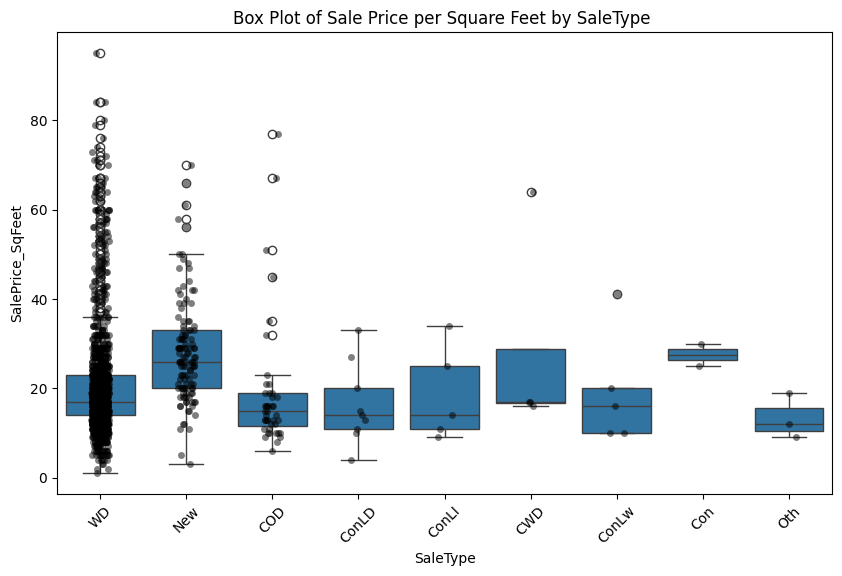

In [80]:
plot_boxplot(classtrain_df,'SaleType', 'SalePrice_SqFeet', 'Box Plot of Sale Price per Square Feet by SaleType ')

In [81]:
thresholds = [19, 23]
saleType_tier = set_tier(classtrain_df, 'SaleType', 'SalePrice_SqFeet', thresholds)

### SaleCondition

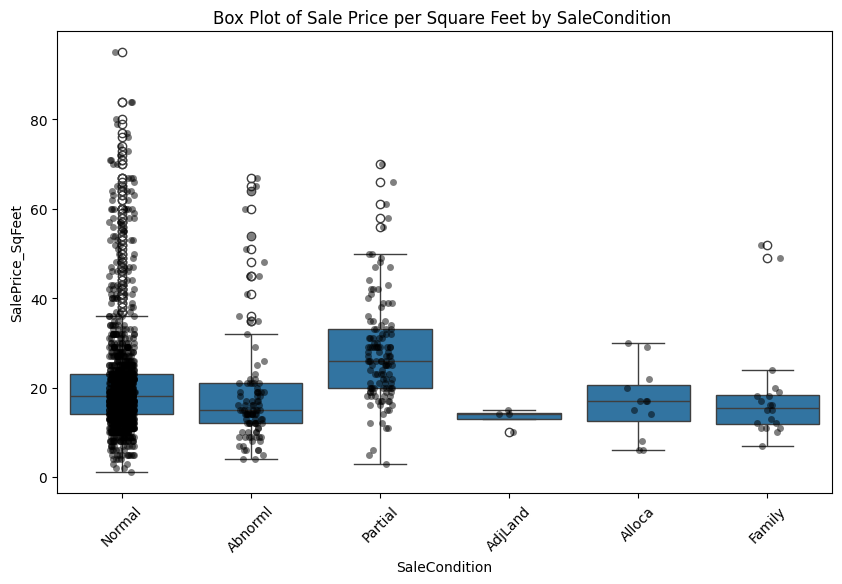

In [82]:
plot_boxplot(classtrain_df,'SaleCondition', 'SalePrice_SqFeet', 'Box Plot of Sale Price per Square Feet by SaleCondition ')

In [83]:
thresholds = [15, 19]
saleCondition_tier = set_tier(classtrain_df, 'SaleCondition', 'SalePrice_SqFeet', thresholds)

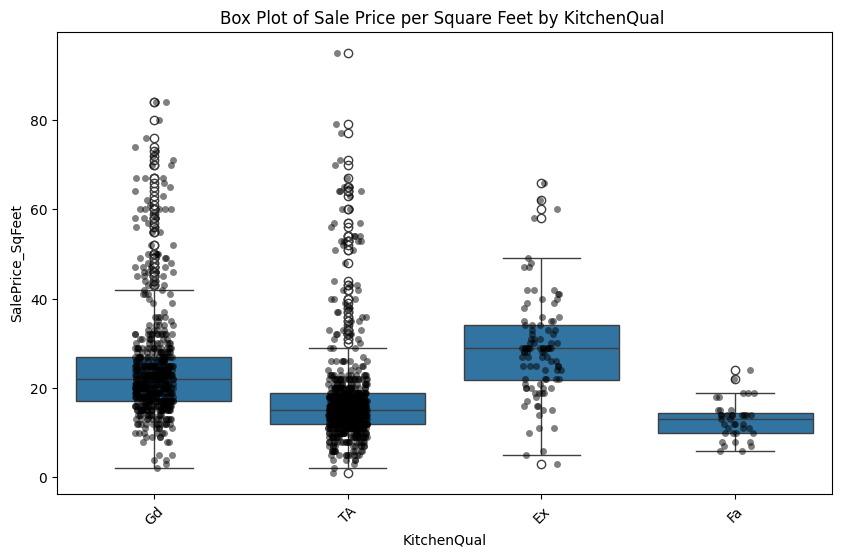

In [84]:
plot_boxplot(classtrain_df,'KitchenQual', 'SalePrice_SqFeet', 'Box Plot of Sale Price per Square Feet by KitchenQual ')

In [85]:
thresholds = [16, 23]
kitchenQual_tier = set_tier(classtrain_df, 'KitchenQual', 'SalePrice_SqFeet', thresholds)


In [86]:
# List of DataFrames with 'tier' in their variable names
active_dataframes_tier = [var for var in globals() if isinstance(globals()[var], pd.DataFrame) and 'tier' in var.lower()]
# Print the list of DataFrames with 'tier' in their variable names
print(active_dataframes_tier)

['neighborhood_tier', 'mszoning_tier', 'saletype_tier', 'heatingQC_tier', 'exterior1st_tier', 'saleType_tier', 'saleCondition_tier', 'kitchenQual_tier', 'classtrainAppendTier_df']


## Join tier classes 

### Big Marge 

In [87]:
classtrainAppendTier_df= classtrain_df

In [88]:
classtrainAppendTier_df = pd.merge(classtrainAppendTier_df, mszoning_tier, on='MSZoning', how='left')
classtrainAppendTier_df = pd.merge(classtrainAppendTier_df, neighborhood_tier, on='Neighborhood', how='left')
classtrainAppendTier_df = pd.merge(classtrainAppendTier_df, saletype_tier, on='SaleType', how='left')
classtrainAppendTier_df = pd.merge(classtrainAppendTier_df, heatingQC_tier, on='HeatingQC', how='left')
classtrainAppendTier_df = pd.merge(classtrainAppendTier_df, exterior1st_tier, on='Exterior1st', how='left')
classtrainAppendTier_df = pd.merge(classtrainAppendTier_df, saleCondition_tier, on='SaleCondition', how='left')
classtrainAppendTier_df = classtrainAppendTier_df[['Id','MSZoning_tier','Neighborhood_tier','SaleType_tier','HeatingQC_tier','Exterior1st_tier','SaleCondition_tier']]

In [89]:
trainAppende_df =  pd.merge(numtrain_df,classtrainAppendTier_df, on='Id', how='left')
trainAppende_df = trainAppende_df.replace('', pd.NA).dropna()
# Write the DataFrame to an Excel sheet
trainAppende_df.to_excel("trainAppende_df3.xlsx", index=False, sheet_name="columnslist")

In [90]:
trainAppende_df = trainAppende_df.drop('SalePrice_SqFeet', axis=1)
trainAppende_df.head (3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,YrSold,SalePrice,DecadeBuilt,DecadeRemodAdd,MSZoning_tier,Neighborhood_tier,SaleType_tier,HeatingQC_tier,Exterior1st_tier,SaleCondition_tier
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2008,208500,2000,10,1,2,2,3,3,3
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,2007,181500,1970,40,1,1,2,3,2,3
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2008,223500,2000,20,1,2,2,3,3,3


### DecadeBuilt and 

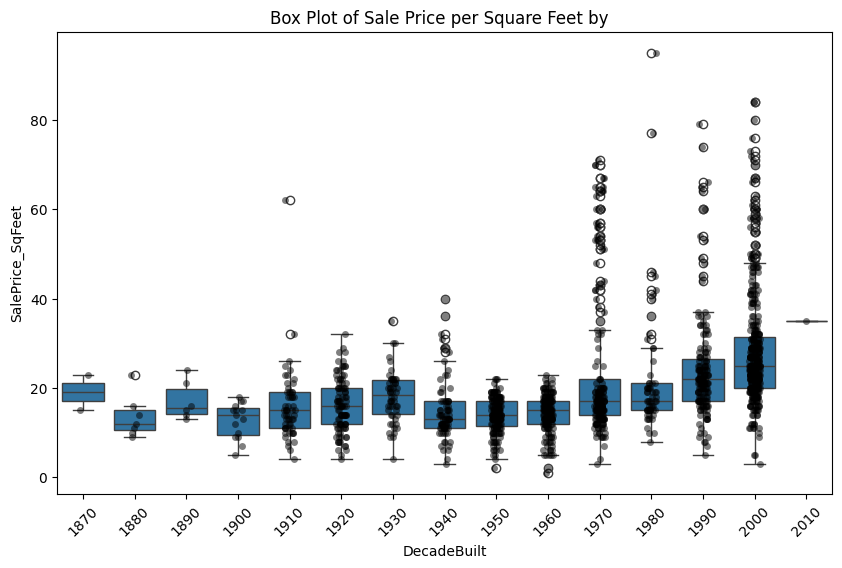

In [91]:
numtrain_df['DecadeBuilt'] =  abs ((numtrain_df['YearBuilt'] // 10) * 10)
plot_boxplot(numtrain_df,'DecadeBuilt', 'SalePrice_SqFeet', 'Box Plot of Sale Price per Square Feet by  ')

# Train/test split 

In [92]:
## Make X_train X_test

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = trainAppende_df.drop(['SalePrice'], axis=1)
y = trainAppende_df['SalePrice']

# Assuming X and y are your feature and target variables for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit a regression model (for example, Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (for example, using mean squared error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1522622258.944355


## Make Small 250 obs


In [94]:
trainAppende_XSdf = trainAppende_df.sample (250) 


small_X = trainAppende_XSdf.drop(['SalePrice'], axis=1)
small_y = trainAppende_XSdf['SalePrice']

# Assuming X and y are your feature and target variables for regression
small_X_train, small_X_test, small_y_train, small_y_test = train_test_split(small_X, small_y, test_size=0.2, random_state=42)


# MinMaxScaler

In [95]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train) 
scaled_X_test = scaler.fit_transform(X_test) 


scaleddf_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
scaleddf_X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

scaleddf_X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,MoSold,YrSold,DecadeBuilt,DecadeRemodAdd,MSZoning_tier,Neighborhood_tier,SaleType_tier,HeatingQC_tier,Exterior1st_tier,SaleCondition_tier
0,0.315284,0.235294,0.184932,0.031335,0.750,0.428571,1.000000,0.983333,0.068750,0.096386,...,1.000000,0.75,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0
1,0.328307,0.058824,0.099315,0.021618,0.250,0.714286,0.441860,0.833333,0.271875,0.029766,...,0.181818,0.25,0.416667,0.166667,0.5,0.0,0.5,0.0,0.0,0.0
2,0.342700,0.823529,0.000000,0.002758,0.500,0.428571,0.720930,0.383333,0.178125,0.063076,...,0.363636,0.25,0.750000,0.500000,0.5,1.0,0.5,0.0,0.5,1.0
3,0.468129,0.000000,0.236301,0.046498,0.875,0.428571,0.945736,0.866667,0.134375,0.187633,...,0.545455,0.25,1.000000,0.166667,0.0,0.5,0.5,1.0,1.0,1.0
4,0.408499,0.294118,0.133562,0.010750,0.500,0.714286,0.232558,0.716667,0.000000,0.000000,...,0.818182,0.00,0.250000,0.166667,0.5,0.0,0.5,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0.409870,0.000000,0.202055,0.054612,0.375,0.571429,0.751938,0.450000,0.286875,0.227321,...,0.181818,0.00,0.750000,0.500000,0.0,0.5,0.5,1.0,0.0,1.0
892,0.111035,0.000000,0.253425,0.050864,0.625,0.428571,0.968992,0.916667,0.141250,0.212792,...,0.363636,1.00,1.000000,0.000000,0.0,0.5,1.0,1.0,1.0,1.0
893,0.934887,0.823529,0.030822,0.008787,0.625,0.428571,0.968992,0.916667,0.000000,0.000000,...,0.272727,0.00,1.000000,0.000000,1.0,1.0,0.5,1.0,0.5,0.0
894,0.977382,0.235294,0.205479,0.045077,0.625,0.428571,0.883721,0.733333,0.280000,0.177179,...,0.636364,0.50,0.916667,0.166667,0.0,0.5,0.5,1.0,1.0,1.0


In [96]:
# Instantiate and fit a regression model (for example, Linear Regression)
model = LinearRegression()
model.fit(scaleddf_X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(scaleddf_X_test)

# Evaluate the model (for example, using mean squared error)
#results_fi = pd.DataFrame({'Actual': y_test, 'Predicted': np.round  (y_pred,0)})
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2271849054.016744


In [97]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

ratiobar = .10
results_df['Within_10_percent'] = ((results_df['Actual'] >=(1- ratiobar) * results_df['Predicted']) &
                                   (results_df['Actual'] <= (1+ ratiobar ) * results_df['Predicted'])).astype(int)


ratio_within_10_percent = results_df['Within_10_percent'].sum() / len(results_df)
print(f'Ratio of instances within 10%: {ratio_within_10_percent}')

Ratio of instances within 10%: 0.25333333333333335


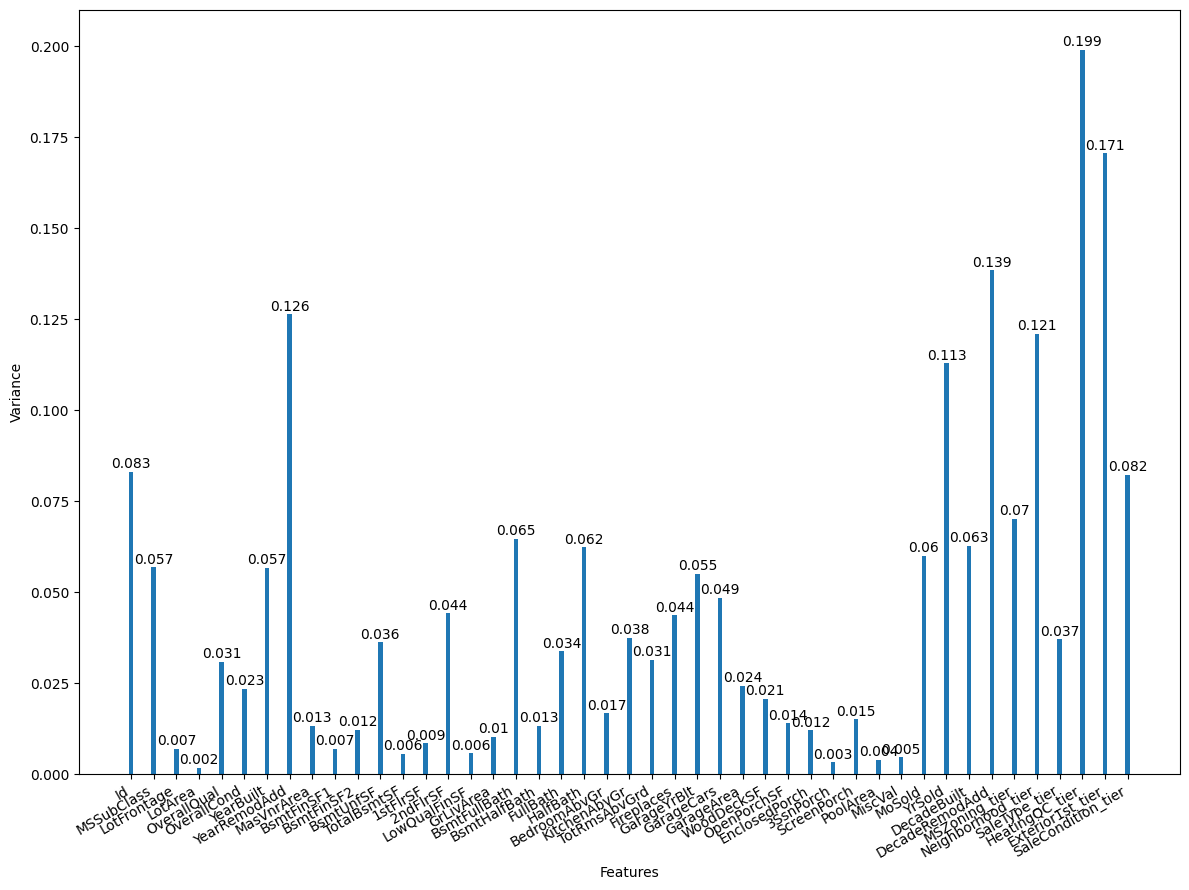

In [98]:
fig, ax = plt.subplots()

x = X.columns
y = scaled_X_train.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_ylabel('Variance')
ax.set_ylim(0, 0.21)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')
    
fig.autofmt_xdate()
plt.tight_layout()

In [99]:
keepList = scaleddf_X_train.var(axis=0)
keepList = pd.DataFrame({'ColumnName': keepList.index, 'Variance': keepList.values})

#
keepList = keepList[keepList['Variance'] > 0.05]
keepList = keepList['ColumnName'].tolist()
keepList.append('SalePrice')

trainAppende_df [keepList]

,Id,MSSubClass,YearBuilt,YearRemodAdd,BsmtFullBath,HalfBath,GarageYrBlt,MoSold,YrSold,DecadeBuilt,DecadeRemodAdd,MSZoning_tier,Neighborhood_tier,HeatingQC_tier,Exterior1st_tier,SaleCondition_tier,SalePrice
0,1,60,2003,2003,1,1,2003.0,2,2008,2000,10,1,2,3,3,3,208500
1,2,20,1976,1976,0,0,1976.0,5,2007,1970,40,1,1,3,2,3,181500
2,3,60,2001,2002,1,1,2001.0,9,2008,2000,20,1,2,3,3,3,223500
3,4,70,1915,1970,1,0,1998.0,2,2006,1910,50,1,2,2,1,2,140000
4,5,60,2000,2000,1,1,2000.0,12,2008,2000,20,1,2,3,3,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,1999,2000,0,1,1999.0,8,2007,1990,20,1,1,3,3,3,175000
1456,1457,20,1978,1988,1,0,1978.0,2,2010,1970,30,1,1,1,1,3,210000
1457,1458,70,1941,2006,0,0,1941.0,5,2010,1940,10,1,2,3,3,3,266500
1458,1459,20,1950,1996,1,0,1950.0,4,2010,1950,20,1,1,2,2,3,142125


In [100]:
scaled_X_train = scaler.fit_transform(X_train) 
scaled_X_test = scaler.fit_transform(X_test) 


scaleddf_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
scaleddf_X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

#
columns_to_drop = ['YearBuilt', 'YearRemodAdd']
scaleddf_X_train = scaleddf_X_train.drop(columns=columns_to_drop)
scaleddf_X_test = scaleddf_X_test.drop(columns=columns_to_drop)

In [101]:
# Instantiate and fit a regression model (for example, Linear Regression)
model = LinearRegression()
model.fit(scaleddf_X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(scaleddf_X_test)

# Evaluate the model (for example, using mean squared error)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': np.round  (y_pred,0)})
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2043448638.6019864


MSSubClass	YearBuilt		YearRemodAdd	BsmtFullBath	HalfBath	GarageYrBlt		MoSold	0.060012
36	YrSold	0.113038
38	MSZoning_tier	0.070236
39	Neighborhood_tier	0.121078
41	HeatingQC_tier	0.199336
42	Exterior1st_tier	0.170842
43	SaleCondition_tier	0.082321

In [102]:
# Add a new column indicating whether Actual is within 10% of Predicted
ratiobar = .10
results_df['Within_10_percent'] = ((results_df['Actual'] >=(1- ratiobar) * results_df['Predicted']) &
                                   (results_df['Actual'] <= (1+ ratiobar ) * results_df['Predicted'])).astype(int)


In [103]:
ratio_within_10_percent = results_df['Within_10_percent'].sum() / len(results_df)

print(f'Ratio of instances within 10%: {ratio_within_10_percent}')

Ratio of instances within 10%: 0.27555555555555555


## Recursive feature elimination (RFE) 

In [104]:

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = scaleddf_X_train.copy(), scaleddf_X_test.copy(), y_train.copy(), y_test.copy()


In [105]:
X_test_v2.head (3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MoSold,YrSold,DecadeBuilt,DecadeRemodAdd,MSZoning_tier,Neighborhood_tier,SaleType_tier,HeatingQC_tier,Exterior1st_tier,SaleCondition_tier
0,0.891185,0.941176,0.086957,0.041344,0.428571,0.428571,0.070085,0.250000,0.0,0.000000,...,0.454545,0.00,0.923077,0.000000,0.5,0.0,1.0,0.5,1.0,1.0
1,0.088843,0.000000,0.335404,0.112778,0.285714,0.571429,0.000000,0.185101,0.0,0.375571,...,0.545455,0.25,0.538462,0.166667,0.0,0.0,0.5,0.5,0.5,1.0
2,0.204545,1.000000,0.428571,0.273654,0.285714,0.428571,0.047863,0.384369,0.0,0.184932,...,0.454545,0.00,0.538462,0.833333,0.0,0.5,0.5,0.0,0.5,1.0


In [106]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train = X_train_v2
X_test = X_test_v2
# Choose a linear model
model = LinearRegression()

# Apply RFE to select the top k features. Specify the number of features you want to retain (n_features_to_select).
n_features_to_select = 10  # Adjust as needed
rfe = RFE(model, n_features_to_select=n_features_to_select)
X_train_rfe = rfe.fit_transform(X_train, y_train)

# View selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Train the model
model.fit(X_train_rfe, y_train)

# Predict on the test set using the selected features
X_test_rfe = X_test[selected_features]
y_pred = model.predict(X_test_rfe)

# Add the predicted values to the test set
X_test_rfe['Predicted'] = np.round (y_pred,0)
X_test_rfe['Actual'] = y_test.values  


# Train and evaluate the model
accuracy = model.score(X_test_rfe[selected_features], y_test)  
print("Model Accuracy:", accuracy)

# Display the DataFrame with selected features and predicted values
print(X_test_rfe.head())

Selected Features: Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'GrLivArea', 'BedroomAbvGr', 'GarageCars', 'PoolArea', 'DecadeBuilt'],
      dtype='object')
Model Accuracy: 0.7592580790497531
    LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  GrLivArea  \
0  0.041344     0.428571     0.428571    0.070085    0.250000   0.119913   
1  0.112778     0.285714     0.571429    0.000000    0.185101   0.189094   
2  0.273654     0.285714     0.428571    0.047863    0.384369   0.191536   
3  0.125938     0.285714     0.428571    0.000000    0.340951   0.097667   
4  0.132248     0.285714     0.428571    0.273504    0.000000   0.377103   

   BedroomAbvGr  GarageCars  PoolArea  DecadeBuilt  Predicted  Actual  
0          0.25    0.333333       0.0     0.923077   176260.0  140000  
1          0.50    0.333333       0.0     0.538462   152891.0  150750  
2          0.25    0.000000       0.0     0.538462   179866.0  157000  
3          0.50    0.3333

C:\Users\46763\AppData\Local\Temp\ipykernel_50732\3864245323.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_rfe['Predicted'] = np.round (y_pred,0)
C:\Users\46763\AppData\Local\Temp\ipykernel_50732\3864245323.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_rfe['Actual'] = y_test.values


In [109]:
# Create a DataFrame with actual and predicted values
results_df = X_test_rfe

ratiobar = .10
results_df['Within_10_percent'] = ((results_df['Actual'] >=(1- ratiobar) * results_df['Predicted']) &
                                   (results_df['Actual'] <= (1+ ratiobar ) * results_df['Predicted'])).astype(int)

ratiobar = .15
results_df['Within_15_percent'] = ((results_df['Actual'] >=(1- ratiobar) * results_df['Predicted']) &
                                   (results_df['Actual'] <= (1+ ratiobar ) * results_df['Predicted'])).astype(int)

ratiobar = .20
results_df['Within_20_percent'] = ((results_df['Actual'] >=(1- ratiobar) * results_df['Predicted']) &
                                   (results_df['Actual'] <= (1+ ratiobar ) * results_df['Predicted'])).astype(int)

results_df['ratio'] =( results_df['Actual'] - results_df['Predicted']) / results_df['Actual'] 


#results_df['Within_10_percent_Neg'] = results_df((results_df['ratio'] <= 0 & results_df['Within_10_percent'] ==1)).astype(int)
results_df['Under_10_percent_Neg'] =  np.where(results_df['ratio'] <= -0.10, 'Under_Ten', 'Okey')
results_df.head (3)


C:\Users\46763\AppData\Local\Temp\ipykernel_50732\2777503742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['Within_10_percent'] = ((results_df['Actual'] >=(1- ratiobar) * results_df['Predicted']) &
C:\Users\46763\AppData\Local\Temp\ipykernel_50732\2777503742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['Within_15_percent'] = ((results_df['Actual'] >=(1- ratiobar) * results_df['Predicted']) &
C:\Users\46763\AppData\Local\Temp\ipykernel_50732\2777503742.py:13: SettingWithCop

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,GrLivArea,BedroomAbvGr,GarageCars,PoolArea,DecadeBuilt,Predicted,Actual,Within_10_percent,Within_15_percent,Within_20_percent,ratio,Under_10_percent_Neg
0,0.041344,0.428571,0.428571,0.070085,0.250000,0.119913,0.25,0.333333,0.0,0.923077,176260.0,140000,0,0,0,-0.259000,Under_Ten
1,0.112778,0.285714,0.571429,0.000000,0.185101,0.189094,0.50,0.333333,0.0,0.538462,152891.0,150750,1,1,1,-0.014202,Okey
2,0.273654,0.285714,0.428571,0.047863,0.384369,0.191536,0.25,0.000000,0.0,0.538462,179866.0,157000,0,1,1,-0.145643,Under_Ten


In [110]:
ratio_within_10_percent = results_df['Within_10_percent'].sum() / len(results_df)
ratio_within_15_percent = results_df['Within_15_percent'].sum() / len(results_df)
ratio_within_20_percent = results_df['Within_20_percent'].sum() / len(results_df)
#ratio_within_10_percent_Neg = results_df['Under_10_percent_Neg'].sum() / len(results_df)
print(f'Ratio of instances within 10%: {ratio_within_10_percent}')
print(f'Ratio of instances within 15%: {ratio_within_15_percent}')
print(f'Ratio of instances within 20%: {ratio_within_20_percent}')
#print(f' Uner 15% : {ratio_within_20_percent}')

Ratio of instances within 10%: 0.3288888888888889
Ratio of instances within 15%: 0.56
Ratio of instances within 20%: 0.6977777777777778


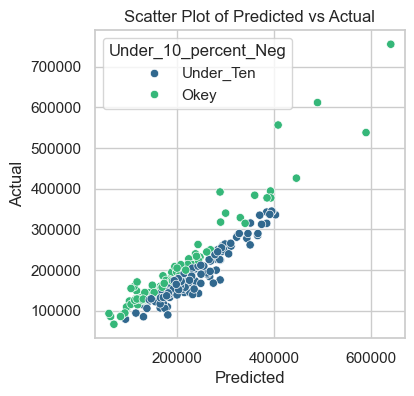

In [111]:
# Assuming 'results_df' is your DataFrame
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(4,4 ))
scatter_plot = sns.scatterplot(x='Predicted', y='Actual', hue='Under_10_percent_Neg', data=results_df, palette='viridis')

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Scatter Plot of Predicted vs Actual')

# Add a legend
scatter_plot.legend(title='Under_10_percent_Neg')

# Show the plot
plt.show()

# fiddle with parameters 
    'OverallQual',  'GrLivArea' tryied to suprress that gave error 

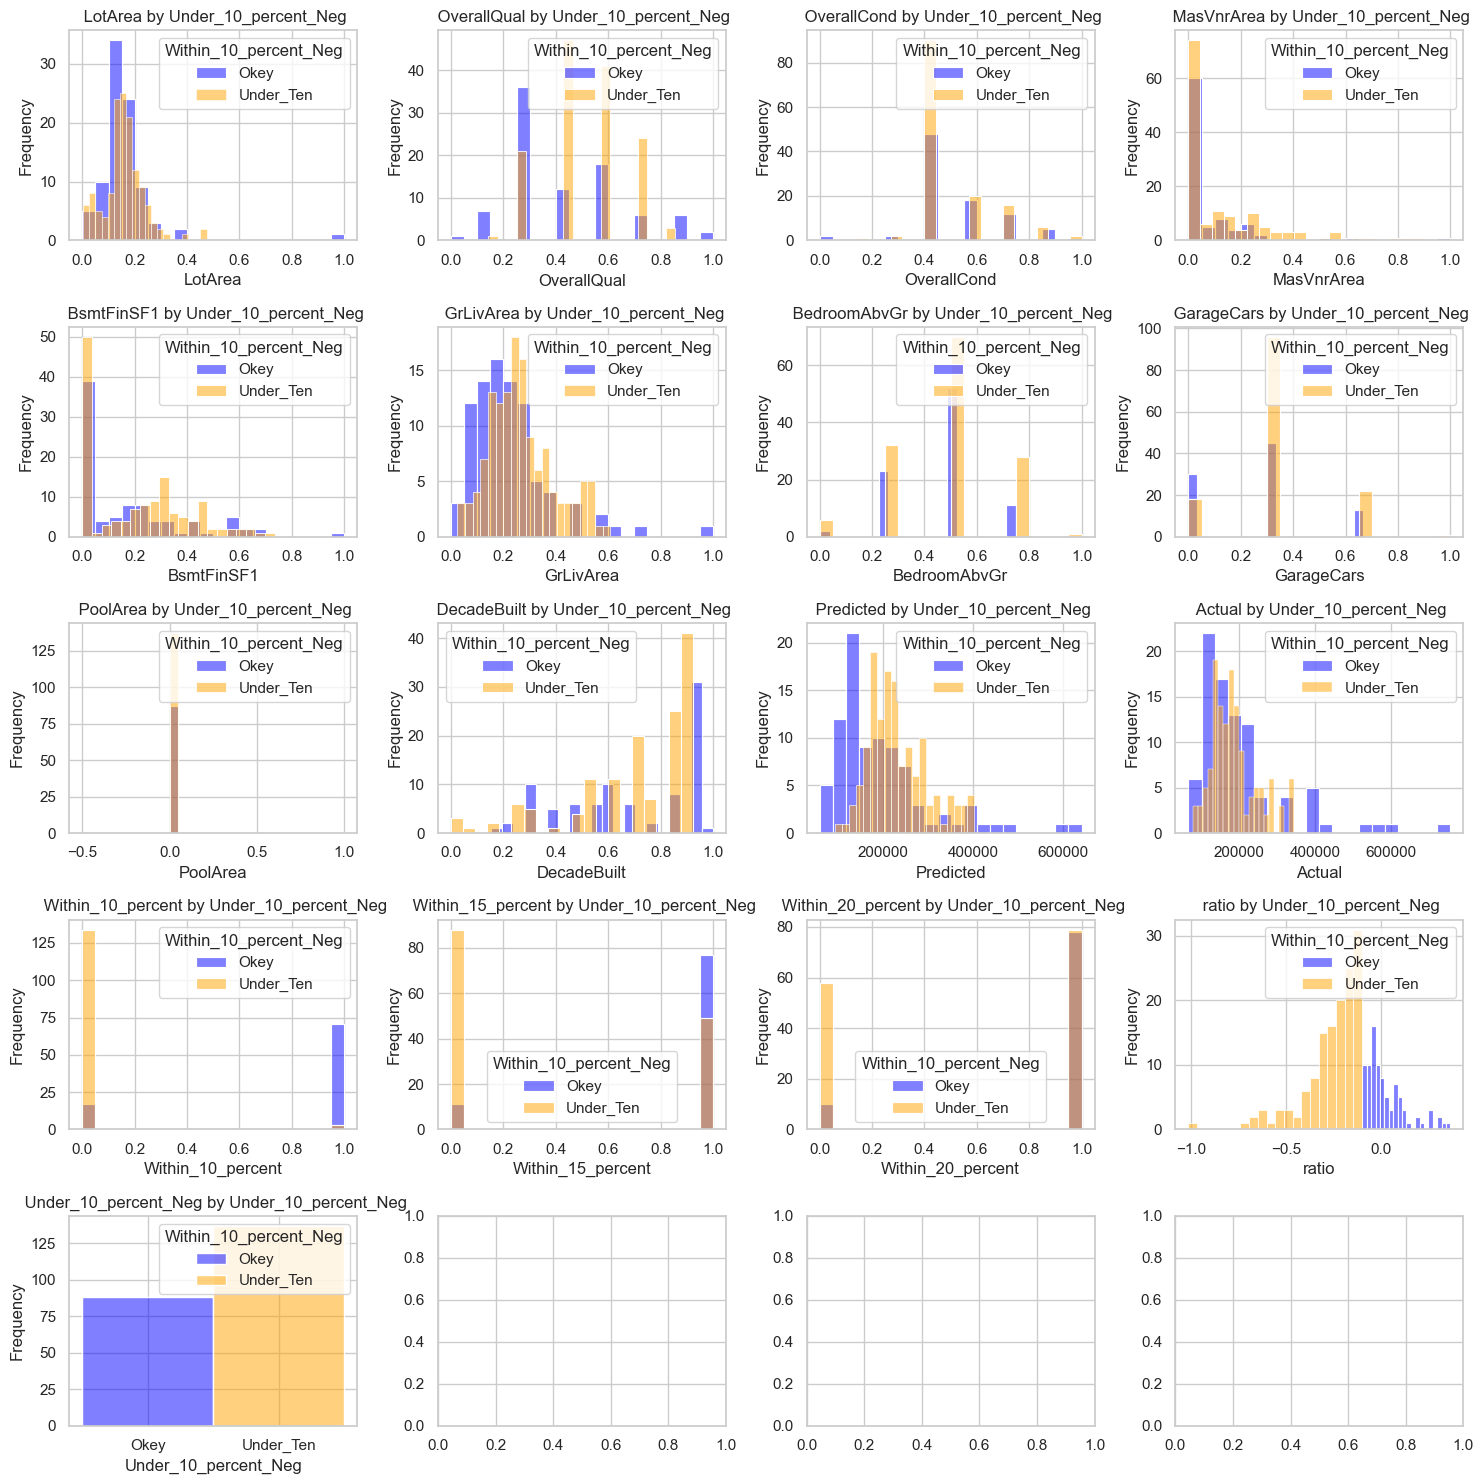

In [55]:

# Set the number of rows and columns in the subplot matrix
num_rows = 5
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array to simplify indexing
axes = axes.flatten()


# Loop over the columns and create dual histograms
for i, columnname in enumerate(results_df):
    sns.set(style="whitegrid")

    # Histogram for Within_10_percent_Neg = 0
    sns.histplot(data=results_df[results_df['Under_10_percent_Neg'] == 'Okey'], x=columnname, color='blue', alpha=0.5, bins=20, ax=axes[i])

    # Histogram for Within_10_percent_Neg = 1
    sns.histplot(data=results_df[results_df['Under_10_percent_Neg'] == 'Under_Ten'], x=columnname, color='orange', alpha=0.5, bins=20, ax=axes[i])

    axes[i].set_xlabel(columnname)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f' {columnname} by Under_10_percent_Neg')
    axes[i].legend(title='Within_10_percent_Neg', labels=['Okey', 'Under_Ten'])

# Adjust layout
plt.tight_layout()
plt.show()


In [112]:
trainAppende_dfx = trainAppende_df
trainAppende_dfx.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,YrSold,SalePrice,DecadeBuilt,DecadeRemodAdd,MSZoning_tier,Neighborhood_tier,SaleType_tier,HeatingQC_tier,Exterior1st_tier,SaleCondition_tier
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2008,208500,2000,10,1,2,2,3,3,3
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,2007,181500,1970,40,1,1,2,3,2,3
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2008,223500,2000,20,1,2,2,3,3,3


In [113]:
# Selecting columns to use

#columns_to_use = ['MSSubClass', 'LotArea', 'OverallQual', 'MasVnrArea', 'GrLivArea','BsmtFullBath', 'GarageCars', 'PoolArea', 'SalePrice_SqFeet', 'SaleType_tier']
#	DecadeRemodAdd	MSZoning_tier	Neighborhood_tier	SaleType_tier	HeatingQC_tier	Exterior1st_tier	SaleCondition_tier
columns_to_use = ['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1','GrLivArea', 
                  'BedroomAbvGr', 'GarageCars', 'PoolArea', 'DecadeBuilt']
columns_to_use += ['DecadeRemodAdd','MSZoning_tier','SaleCondition_tier','Neighborhood_tier']
trainAppende_dfx['SalePriceLog']= np.log (trainAppende_dfx['SalePrice'])

# Extracting features (X) and target variable (y)
X = trainAppende_dfx[columns_to_use]
y = trainAppende_dfx['SalePriceLog']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=columns_to_use)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=columns_to_use)

trainAppende_dfx[columns_to_use].head (3)

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,GrLivArea,BedroomAbvGr,GarageCars,PoolArea,DecadeBuilt,DecadeRemodAdd,MSZoning_tier,SaleCondition_tier,Neighborhood_tier
0,8450,7,5,196.0,706,1710,3,2,0,2000,10,1,3,2
1,9600,6,8,0.0,978,1262,3,2,0,1970,40,1,3,1
2,11250,7,5,162.0,486,1786,3,2,0,2000,20,1,3,2


### LinearRegression

In [114]:
# Performing Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_scaled)

### Ridge model

In [115]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge Regression model
ridge_model = Ridge(alpha=1.0 -0.1)  # You can adjust the regularization strength (alpha) as needed

# Fit the model to the training data
ridge_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

In [116]:


# Creating a DataFrame with the test data, predicted, and actual values
results_fi = pd.DataFrame(X_test_scaled, columns=columns_to_use)

#Log 
results_fi['ActualLog'] =  y_test.values # 'Predicted': y_pred})
results_fi['PredictedLog'] =  np.round (y_pred,6)

#Log
results_fi['Predicted'] =  np.round (np.exp(y_pred),0)
results_fi['Actual'] = np.round (np.exp(y_test.values),0)

# Displaying the results
results_fi.head(3)

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,GrLivArea,BedroomAbvGr,GarageCars,PoolArea,DecadeBuilt,DecadeRemodAdd,MSZoning_tier,SaleCondition_tier,Neighborhood_tier,ActualLog,PredictedLog,Predicted,Actual
0,-0.746453,-0.127144,-0.523381,-0.125770,0.227132,-0.858634,-1.111303,0.211036,-0.074488,1.100923,-1.011587,1.401025,0.315256,-0.683567,11.849398,11.928425,151513.0,140000.0
1,-0.322716,-0.839149,0.410781,-0.569687,-0.073093,-0.373409,0.175167,0.211036,-0.074488,-0.561408,-0.563770,-0.486672,0.315256,-0.683567,11.923378,11.878276,144102.0,150750.0
2,0.631577,-0.839149,-0.523381,-0.266524,0.848725,-0.356284,-1.111303,-1.301669,-0.074488,-0.561408,1.227499,-0.486672,0.315256,0.754170,11.964001,11.779613,130563.0,157000.0


In [117]:
ratiobar = .10
results_fi['Within_10_percent'] = ((results_fi['Actual'] >=(1- ratiobar) * results_fi['Predicted']) &
                                   (results_fi['Actual'] <= (1+ ratiobar ) * results_fi['Predicted'])).astype(int)

ratiobar = .15
results_fi['Within_15_percent'] = ((results_fi['Actual'] >=(1- ratiobar) * results_fi['Predicted']) &
                                   (results_fi['Actual'] <= (1+ ratiobar ) * results_fi['Predicted'])).astype(int)

ratiobar = .20
results_fi['Within_20_percent'] = ((results_fi['Actual'] >=(1- ratiobar) * results_fi['Predicted']) &
                                   (results_fi['Actual'] <= (1+ ratiobar ) * results_fi['Predicted'])).astype(int)

results_fi['ratio'] =( results_fi['Actual'] - results_fi['Predicted']) / results_fi['Actual'] 


#results_fi['Within_10_percent_Neg'] = results_fi((results_fi['ratio'] <= 0 & results_fi['Within_10_percent'] ==1)).astype(int)
results_fi['Under_10_percent_Neg'] =  np.where(results_fi['ratio'] <= -0.10, 'Under_Ten', 'Okey')
results_fi.head (3)


,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,GrLivArea,BedroomAbvGr,GarageCars,PoolArea,DecadeBuilt,...,Neighborhood_tier,ActualLog,PredictedLog,Predicted,Actual,Within_10_percent,Within_15_percent,Within_20_percent,ratio,Under_10_percent_Neg
0,-0.746453,-0.127144,-0.523381,-0.125770,0.227132,-0.858634,-1.111303,0.211036,-0.074488,1.100923,...,-0.683567,11.849398,11.928425,151513.0,140000.0,1,1,1,-0.082236,Okey
1,-0.322716,-0.839149,0.410781,-0.569687,-0.073093,-0.373409,0.175167,0.211036,-0.074488,-0.561408,...,-0.683567,11.923378,11.878276,144102.0,150750.0,1,1,1,0.044100,Okey
2,0.631577,-0.839149,-0.523381,-0.266524,0.848725,-0.356284,-1.111303,-1.301669,-0.074488,-0.561408,...,0.754170,11.964001,11.779613,130563.0,157000.0,0,0,0,0.168389,Okey


In [118]:
ratio_within_10_percent = results_fi['Within_10_percent'].sum() / len(results_fi)
ratio_within_15_percent = results_fi['Within_15_percent'].sum() / len(results_fi)
ratio_within_20_percent = results_fi['Within_20_percent'].sum() / len(results_fi)
#ratio_within_10_percent_Neg = results_fi['Under_10_percent_Neg'].sum() / len(results_fi)
print(f'Ratio of instances within 10%: {ratio_within_10_percent}')
print(f'Ratio of instances within 15%: {ratio_within_15_percent}')
print(f'Ratio of instances within 20%: {ratio_within_20_percent}')
#print(f' Uner 15% : {ratio_within_20_percent}')

Ratio of instances within 10%: 0.6
Ratio of instances within 15%: 0.7955555555555556
Ratio of instances within 20%: 0.8666666666666667


In [119]:
#Load
submission = pd.read_csv("test.csv")
submission.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal


### Add features  
mszoning_tier, on='MSZoning'
neighborhood_tier, on='Neighborhood',
saletype_tier, on='SaleType', how='left')
heatingQC_tier, on='HeatingQC', how='left')
exterior1st_tier, on='Exterior1st', how='left')
saleCondition_tier, on='SaleCondition', how='left')

In [120]:
# Add features  
submission['DecadeBuilt'] =  abs ((submission['YearBuilt'] // 10) * 10)
submission['DecadeRemodAdd'] = abs( ((2022 - submission.YearRemodAdd) // 10) * 10)

#['SaleCondition_tier', 'Neighborhood_tier'] 
submission = pd.merge(submission, mszoning_tier, on='MSZoning', how='left')
submission = pd.merge(submission, neighborhood_tier, on='Neighborhood', how='left')
submission = pd.merge(submission, saleCondition_tier, on='SaleCondition', how='left')
submission.set_index('Id', inplace=True)
submission.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,DecadeBuilt,DecadeRemodAdd,MSZoning_tier,Neighborhood_tier,SaleCondition_tier
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,6,2010,WD,Normal,1960,60,2.0,1,3
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,12500,6,2010,WD,Normal,1950,60,1.0,1,3
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,3,2010,WD,Normal,1990,20,1.0,1,3


In [121]:
#columns_to_use

In [122]:

submission = submission[columns_to_use]
submission.fillna(method='bfill', inplace=True)

# Standardize features for ridge_model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(submission)
#X_train_scaled.fillna(value = 0.5, inplace=True)
# Could some Nans some where 

# Predict
submission["SalePriceLog"]  = ridge_model.predict(X_train_scaled)
submission["SalePrice"]  = np.exp(submission["SalePriceLog"])
submission.head (3)

C:\Users\46763\AppData\Local\Temp\ipykernel_50732\1333585576.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  submission.fillna(method='bfill', inplace=True)


,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,GrLivArea,BedroomAbvGr,GarageCars,PoolArea,DecadeBuilt,DecadeRemodAdd,MSZoning_tier,SaleCondition_tier,Neighborhood_tier,SalePriceLog,SalePrice
Id,,,,,,,,,,,,,,,,
1461,11622,5,6,0.0,468.0,896,2,1.0,0,1960,60,2.0,3,1,11.657681,115575.671212
1462,14267,6,6,108.0,923.0,1329,3,1.0,0,1950,60,1.0,3,1,11.962249,156725.206472
1463,13830,5,5,0.0,791.0,1629,3,2.0,0,1990,20,1.0,3,1,12.076896,175763.741101


## XGBRegressor

In [123]:
trainAppende_dfx = trainAppende_df

In [124]:
columns_to_use = ['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1','GrLivArea', 
                  'BedroomAbvGr', 'GarageCars', 'PoolArea', 'DecadeBuilt']
columns_to_use += ['DecadeRemodAdd','MSZoning_tier','SaleCondition_tier','Neighborhood_tier']
trainAppende_dfx['SalePriceLog']= np.log (trainAppende_dfx['SalePrice'])

# Extracting features (X) and target variable (y)
X = trainAppende_dfx[columns_to_use]
y = trainAppende_dfx['SalePriceLog']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=columns_to_use)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=columns_to_use)

trainAppende_dfx[columns_to_use].head (3)

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,GrLivArea,BedroomAbvGr,GarageCars,PoolArea,DecadeBuilt,DecadeRemodAdd,MSZoning_tier,SaleCondition_tier,Neighborhood_tier
0,8450,7,5,196.0,706,1710,3,2,0,2000,10,1,3,2
1,9600,6,8,0.0,978,1262,3,2,0,1970,40,1,3,1
2,11250,7,5,162.0,486,1786,3,2,0,2000,20,1,3,2


In [125]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model to the training data
model_xgb.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model_xgb.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.016988299019153285


In [126]:
# Creating a DataFrame with the test data, predicted, and actual values
results_xgb = pd.DataFrame(X_test_scaled, columns=columns_to_use)

#Log 
results_xgb['ActualLog'] =  y_test.values # 'Predicted': y_pred})
results_xgb['PredictedLog'] =  np.round (y_pred,6)

#Log
results_xgb['Predicted'] =  np.round (np.exp(y_pred),0)
results_xgb['Actual'] = np.round (np.exp(y_test.values),0)

# Displaying the results
results_xgb.head(3)

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,GrLivArea,BedroomAbvGr,GarageCars,PoolArea,DecadeBuilt,DecadeRemodAdd,MSZoning_tier,SaleCondition_tier,Neighborhood_tier,ActualLog,PredictedLog,Predicted,Actual
0,0.011101,0.500,0.428571,0.05125,0.096917,0.121829,0.333333,0.333333,0.0,1.000000,0.000000,0.5,1.0,0.0,11.849398,11.932901,152192.0,140000.0
1,0.028456,0.375,0.571429,0.00000,0.071758,0.170830,0.500000,0.333333,0.0,0.583333,0.166667,0.0,1.0,0.0,11.923378,11.950348,154871.0,150750.0
2,0.067541,0.375,0.428571,0.03500,0.149008,0.172560,0.333333,0.000000,0.0,0.583333,0.833333,0.0,1.0,0.5,11.964001,11.955780,155715.0,157000.0


In [127]:
ratiobar = .10
results_xgb['Within_10_percent'] = ((results_xgb['Actual'] >=(1- ratiobar) * results_xgb['Predicted']) &
                                   (results_xgb['Actual'] <= (1+ ratiobar ) * results_xgb['Predicted'])).astype(int)

ratiobar = .15
results_xgb['Within_15_percent'] = ((results_xgb['Actual'] >=(1- ratiobar) * results_xgb['Predicted']) &
                                   (results_xgb['Actual'] <= (1+ ratiobar ) * results_xgb['Predicted'])).astype(int)

ratiobar = .20
results_xgb['Within_20_percent'] = ((results_xgb['Actual'] >=(1- ratiobar) * results_xgb['Predicted']) &
                                   (results_xgb['Actual'] <= (1+ ratiobar ) * results_xgb['Predicted'])).astype(int)

results_xgb['ratio'] =( results_xgb['Actual'] - results_xgb['Predicted']) / results_xgb['Actual'] 


#results_fi['Within_10_percent_Neg'] = results_fi((results_fi['ratio'] <= 0 & results_fi['Within_10_percent'] ==1)).astype(int)
results_xgb['Under_10_percent_Neg'] =  np.where(results_xgb['ratio'] <= -0.10, 'Under_Ten', 'Okey')
results_xgb.head (3)

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,GrLivArea,BedroomAbvGr,GarageCars,PoolArea,DecadeBuilt,...,Neighborhood_tier,ActualLog,PredictedLog,Predicted,Actual,Within_10_percent,Within_15_percent,Within_20_percent,ratio,Under_10_percent_Neg
0,0.011101,0.500,0.428571,0.05125,0.096917,0.121829,0.333333,0.333333,0.0,1.000000,...,0.0,11.849398,11.932901,152192.0,140000.0,1,1,1,-0.087086,Okey
1,0.028456,0.375,0.571429,0.00000,0.071758,0.170830,0.500000,0.333333,0.0,0.583333,...,0.0,11.923378,11.950348,154871.0,150750.0,1,1,1,-0.027337,Okey
2,0.067541,0.375,0.428571,0.03500,0.149008,0.172560,0.333333,0.000000,0.0,0.583333,...,0.5,11.964001,11.955780,155715.0,157000.0,1,1,1,0.008185,Okey


In [128]:
ratio_within_10_percent = results_xgb['Within_10_percent'].sum() / len(results_xgb)
ratio_within_15_percent = results_xgb['Within_15_percent'].sum() / len(results_xgb)
ratio_within_20_percent = results_xgb['Within_20_percent'].sum() / len(results_xgb)

print(f'Ratio of instances within 10%: {ratio_within_10_percent}')
print(f'Ratio of instances within 15%: {ratio_within_15_percent}')
print(f'Ratio of instances within 20%: {ratio_within_20_percent}')


Ratio of instances within 10%: 0.6311111111111111
Ratio of instances within 15%: 0.7733333333333333
Ratio of instances within 20%: 0.8711111111111111


# Submission

## Load of test and Prep
Load tranform, add features, Standardize featuresand fill NAs 

In [129]:
submission = pd.read_csv("test.csv")

# Add features  
submission['DecadeBuilt'] =  abs ((submission['YearBuilt'] // 10) * 10)
submission['DecadeRemodAdd'] = abs( ((2022 - submission.YearRemodAdd) // 10) * 10)

#['SaleCondition_tier', 'Neighborhood_tier'] 
submission = pd.merge(submission, mszoning_tier, on='MSZoning', how='left')
submission = pd.merge(submission, neighborhood_tier, on='Neighborhood', how='left')
submission = pd.merge(submission, saleCondition_tier, on='SaleCondition', how='left')
submission.set_index('Id', inplace=True)

submission = submission[columns_to_use]
submission.fillna(method='bfill', inplace=True)


# Standardize features for ridge_model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(submission)


C:\Users\46763\AppData\Local\Temp\ipykernel_50732\1858372779.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  submission.fillna(method='bfill', inplace=True)


## Predict

In [130]:

# Predict
submission["SalePriceLog"]  = model_xgb.predict(X_train_scaled)
submission["SalePrice"]  = np.exp(submission["SalePriceLog"])
submission.head (3)

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,GrLivArea,BedroomAbvGr,GarageCars,PoolArea,DecadeBuilt,DecadeRemodAdd,MSZoning_tier,SaleCondition_tier,Neighborhood_tier,SalePriceLog,SalePrice
Id,,,,,,,,,,,,,,,,
1461,11622,5,6,0.0,468.0,896,2,1.0,0,1960,60,2.0,3,1,11.314314,81986.828125
1462,14267,6,6,108.0,923.0,1329,3,1.0,0,1950,60,1.0,3,1,11.267807,78261.179688
1463,13830,5,5,0.0,791.0,1629,3,2.0,0,1990,20,1.0,3,1,12.088413,177799.750000


In [131]:
submissionToCsv = submission
#submissionToCsv.reset_index(inplace=True)
submissionToCsv['Id'] = submissionToCsv.index
submissionToCsv = submissionToCsv[['Id','SalePrice']].copy()
submissionToCsv.to_csv("submission006.csv", index=False)
submissionToCsv

,Id,SalePrice
Id,,
1461,1461,81986.828125
1462,1462,78261.179688
1463,1463,177799.750000
1464,1464,164689.640625
1465,1465,147016.656250
...,...,...
2915,2915,62559.343750
2916,2916,56390.707031
2917,2917,90376.132812


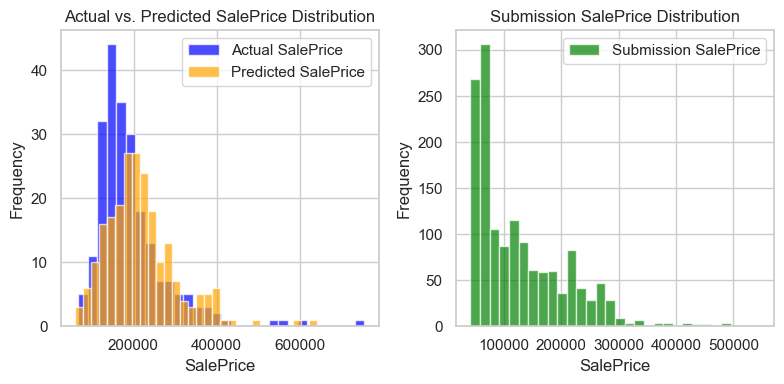

In [132]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(results_df['Actual'], bins=30, color='blue', alpha=0.7, label='Actual SalePrice')
plt.hist(results_df['Predicted'], bins=30, color='orange', alpha=0.7, label='Predicted SalePrice')
plt.title('Actual vs. Predicted SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(submission['SalePrice'], bins=30, color='green', alpha=0.7, label='Submission SalePrice')
plt.title('Submission SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
np.